In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict


In [ ]:
filepath = 'https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification'

In [ ]:
od.download(filepath)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chrisbiran
Your Kaggle Key: ··········


100%|██████████| 70.6k/70.6k [00:00<00:00, 19.5MB/s]

In [ ]:
df_train = pd.read_csv('/content/mobile-price-classification/train.csv')
df_test = pd.read_csv('/content/mobile-price-classification/test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.shape, df_test.shape

((2000, 21), (1000, 21))

In [ ]:
# Memisahkan fitur dan target untuk df_train
X_train = df_train.drop('price_range', axis=1)
y_train = df_train['price_range']

# Memisahkan fitur dan target untuk df_test
X_test = df_test.drop('id', axis=1)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Build a Gaussian Classifier
model = GaussianNB()
# Model training
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Melakukan cross-validation dan membuat prediksi
y_pred = cross_val_predict(model, X_train, y_train, cv=5)  # Ganti nilai cv sesuai dengan jumlah fold yang diinginkan

In [ ]:
from sklearn.model_selection import cross_val_score
# Melakukan cross-validation dan mencetak nilai akurasi untuk setiap fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Ganti nilai cv sesuai dengan jumlah fold yang diinginkan
print('Cross-Validation Scores:', cv_scores)


# Menampilkan rata-rata akurasi dari cross-validation
print('Average Accuracy:', cv_scores.mean())

Cross-Validation Scores: [0.805  0.82   0.83   0.8075 0.7825]
Average Accuracy: 0.8089999999999999


In [ ]:
# Mencetak classification report
labels = df_train['price_range'].unique()
class_report = classification_report(y_train, y_pred, labels=labels)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72       500
           2       0.71      0.72      0.72       500
           3       0.90      0.89      0.90       500
           0       0.91      0.90      0.91       500

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



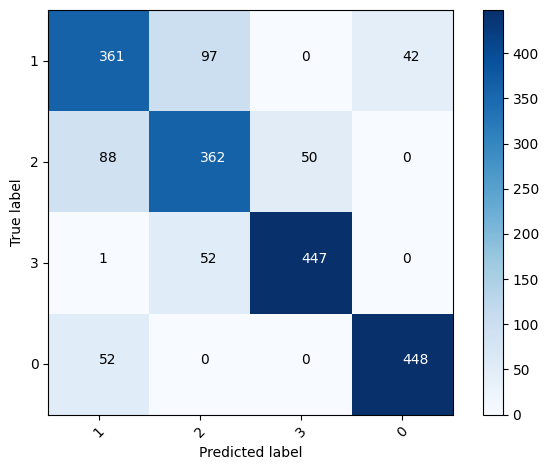

In [ ]:
# Mencetak confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)  # Plot confusion matrix grid
threshold = cnf_matrix.max() / 2  # Threshold to define text color
for i in range(cnf_matrix.shape[0]):  # Print text in grid
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j], color="w" if cnf_matrix[i, j] > threshold else 'black')
tick_marks = np.arange(len(labels))  # Define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
plt.show()

<ipython-input-41-9b9a1d850d29>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_subset[y_train == j, 0], X_train_subset[y_train == j, 1],


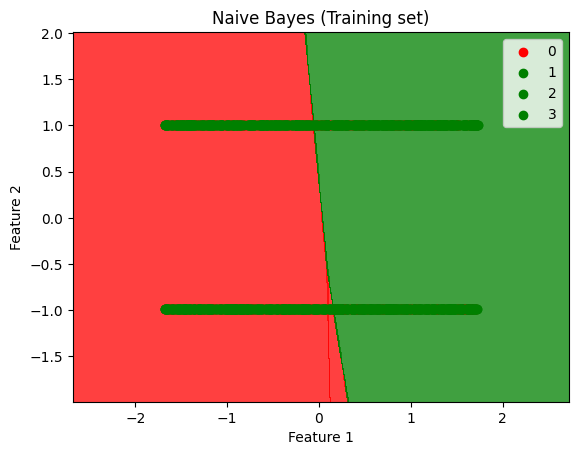

In [ ]:
# Memilih dua fitur utama
X_train_subset = X_train[:, [0, 1]]

# Membuat model Naive Bayes
model_subset = GaussianNB()
model_subset.fit(X_train_subset, y_train)

# Plot decision boundary pada data dua dimensi
x1, x2 = np.meshgrid(np.arange(start=X_train_subset[:, 0].min() - 1, stop=X_train_subset[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_subset[:, 1].min() - 1, stop=X_train_subset[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, model_subset.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot data latih
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_subset[y_train == j, 0], X_train_subset[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show();

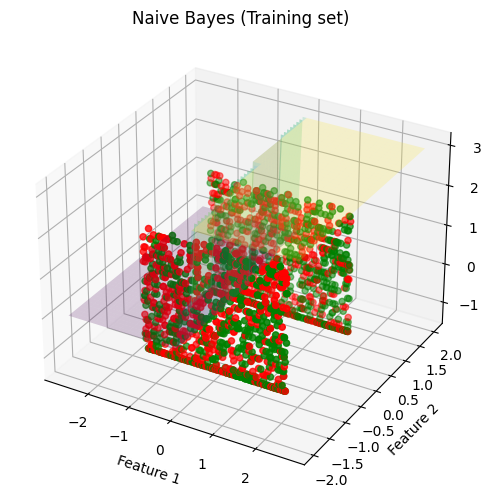

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Memilih tiga fitur utama
X_train_subset = X_train[:, [0, 1, 2]]

# Membuat model Naive Bayes
model_subset = GaussianNB()
model_subset.fit(X_train_subset, y_train)

# Plot decision boundary dalam ruang 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x1, x2, x3 = X_train_subset[:, 0], X_train_subset[:, 1], X_train_subset[:, 2]
ax.scatter(x1, x2, x3, c=y_train, cmap=ListedColormap(('red', 'green')))

# Menyiapkan grid dalam ruang 3D untuk decision boundary
x1_range = np.arange(x1.min() - 1, x1.max() + 1, 0.1)
x2_range = np.arange(x2.min() - 1, x2.max() + 1, 0.1)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Menyiapkan grid x3 sesuai dengan model
x3_pred = model_subset.predict(np.array([x1_grid.ravel(), x2_grid.ravel(), np.zeros_like(x1_grid.ravel())]).T).reshape(x1_grid.shape)

# Plot decision boundary
ax.plot_surface(x1_grid, x2_grid, x3_pred, alpha=0.2, cmap='viridis')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Naive Bayes (Training set)')
plt.show()


# SVM

In [ ]:
# Classifier
model = SVC(kernel = 'linear', random_state = 112, probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=112)

In [ ]:
# Melakukan prediksi pada data latih
y_pred = model.predict(X_train)

In [ ]:
# Menampilkan hasil evaluasi pada data latih
print("Confusion Matrix (Training set):\n", confusion_matrix(y_train, y_pred))

Confusion Matrix (Training set):
 [[495   5   0   0]
 [  6 488   6   0]
 [  0   7 482  11]
 [  0   0   5 495]]


In [ ]:
# Melakukan cross-validation dan mencetak nilai akurasi untuk setiap fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Ganti nilai cv sesuai dengan jumlah fold yang diinginkan
print('Cross-Validation Scores:', cv_scores)


# Menampilkan rata-rata akurasi dari cross-validation
print('Average Accuracy:', cv_scores.mean())

Cross-Validation Scores: [0.965  0.9475 0.97   0.955  0.96  ]
Average Accuracy: 0.9595


In [ ]:
# Mencetak classification report
labels = df_train['price_range'].unique()
class_report = classification_report(y_train, y_pred, labels=labels)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       500
           2       0.98      0.96      0.97       500
           3       0.98      0.99      0.98       500
           0       0.99      0.99      0.99       500

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



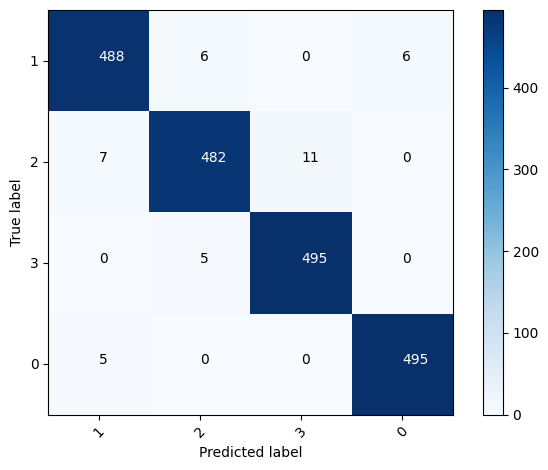

In [ ]:
# Mencetak confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred, labels=labels)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)  # Plot confusion matrix grid
threshold = cnf_matrix.max() / 2  # Threshold to define text color
for i in range(cnf_matrix.shape[0]):  # Print text in grid
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j], color="w" if cnf_matrix[i, j] > threshold else 'black')
tick_marks = np.arange(len(labels))  # Define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
plt.show()

<ipython-input-57-9b9a1d850d29>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_subset[y_train == j, 0], X_train_subset[y_train == j, 1],


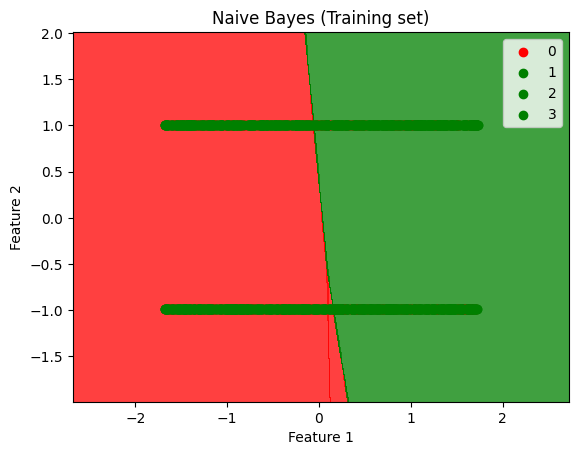

In [ ]:
# Memilih dua fitur utama
X_train_subset = X_train[:, [0, 1]]

# Membuat model Naive Bayes
model_subset = GaussianNB()
model_subset.fit(X_train_subset, y_train)

# Plot decision boundary pada data dua dimensi
x1, x2 = np.meshgrid(np.arange(start=X_train_subset[:, 0].min() - 1, stop=X_train_subset[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_subset[:, 1].min() - 1, stop=X_train_subset[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, model_subset.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot data latih
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_subset[y_train == j, 0], X_train_subset[y_train == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show();

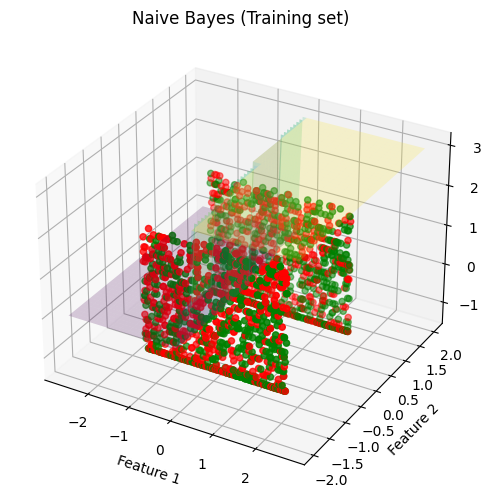

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Memilih tiga fitur utama
X_train_subset = X_train[:, [0, 1, 2]]

# Membuat model Naive Bayes
model_subset = GaussianNB()
model_subset.fit(X_train_subset, y_train)

# Plot decision boundary dalam ruang 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x1, x2, x3 = X_train_subset[:, 0], X_train_subset[:, 1], X_train_subset[:, 2]
ax.scatter(x1, x2, x3, c=y_train, cmap=ListedColormap(('red', 'green')))

# Menyiapkan grid dalam ruang 3D untuk decision boundary
x1_range = np.arange(x1.min() - 1, x1.max() + 1, 0.1)
x2_range = np.arange(x2.min() - 1, x2.max() + 1, 0.1)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Menyiapkan grid x3 sesuai dengan model
x3_pred = model_subset.predict(np.array([x1_grid.ravel(), x2_grid.ravel(), np.zeros_like(x1_grid.ravel())]).T).reshape(x1_grid.shape)

# Plot decision boundary
ax.plot_surface(x1_grid, x2_grid, x3_pred, alpha=0.2, cmap='viridis')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Naive Bayes (Training set)')
plt.show()
